In [33]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os
import pytesseract

In [5]:
path = 'All_Data/'
files = sorted(os.listdir(path))
files

['MTH_LotCard_Tan_015147_01_Dabney_Juanita.PNG',
 'MTH_LotCard_Tan_015148_01.PNG',
 'MTH_LotCard_Tan_015149_01.PNG',
 'MTH_LotCard_Tan_015150_01.PNG',
 'MTH_LotCard_Tan_015151_01.PNG',
 'MTH_LotCard_Tan_015152_01.PNG',
 'MTH_LotCard_Tan_015153_01.PNG',
 'MTH_LotCard_Tan_015154_01.PNG',
 'MTH_LotCard_Tan_015155_01.PNG',
 'MTH_LotCard_Tan_015156_01.PNG',
 'MTH_LotCard_Tan_015157_01.PNG',
 'MTH_LotCard_Tan_015158_01.PNG',
 'MTH_LotCard_Tan_015159_01.PNG',
 'MTH_LotCard_Tan_015160_01.PNG',
 'MTH_LotCard_Tan_015161_01.PNG',
 'MTH_LotCard_Tan_015162_01.PNG',
 'MTH_LotCard_Tan_015163_01.PNG',
 'MTH_LotCard_Tan_015164_01.PNG',
 'MTH_LotCard_Tan_015165_01.PNG',
 'MTH_LotCard_Tan_015166_01.PNG',
 'MTH_LotCard_Tan_015167_01.PNG',
 'MTH_LotCard_Tan_015168_01.PNG',
 'MTH_LotCard_Tan_015169_01.PNG',
 'MTH_LotCard_Tan_015170_01.PNG',
 'MTH_LotCard_Tan_015171_01.PNG',
 'MTH_LotCard_Tan_015172_01.PNG',
 'MTH_LotCard_Tan_015173_01.PNG',
 'MTH_LotCard_Tan_015174_01.PNG',
 'MTH_LotCard_Tan_015175_01_Daily

In [3]:
def img_show(img, code=cv2.COLOR_BGR2RGB):
    cv_rgb = cv2.cvtColor(img, code)
    fig, ax = plt.subplots(figsize=(16, 10))
    ax.imshow(cv_rgb)
    fig.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


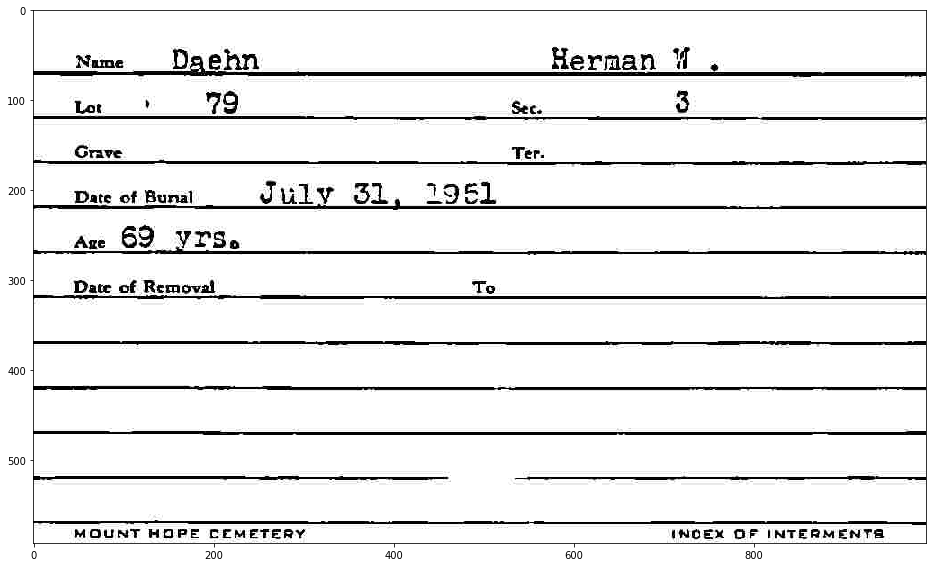

In [13]:
# index of image
i = 421
im = cv2.imread(path+files[i], 1)
# original image
img_show(im)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


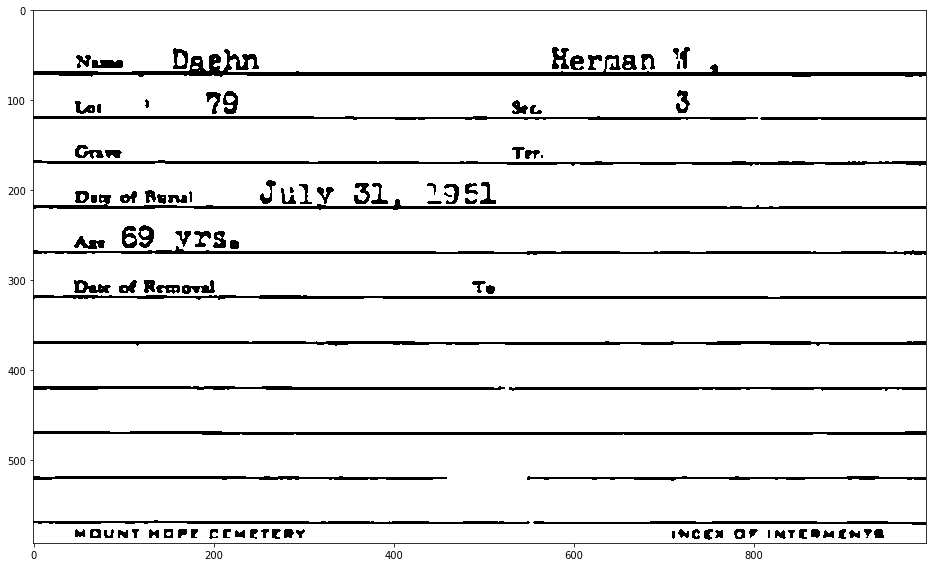

In [19]:
# preprocess:
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, th1 = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
th3 = cv2.adaptiveThreshold(th1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                cv2.THRESH_BINARY, 11, 2)
blur = cv2.medianBlur(th3, 3)  # ksize: 3*3
blur = cv2.medianBlur(blur, 3)

img_show(blur)

In [20]:
# obtain first line
h, w = gray.shape
# horizontal line
horizontal_lines = []
for i in range(h - 1):
    # find the split line
    if abs(np.mean(blur[i, :]) - np.mean(blur[i + 1, :])) > 100:
        # plot the line
        horizontal_lines.append([0, i, w, i])
if horizontal_lines and horizontal_lines[0][1] < 150:
    first_line = horizontal_lines[0]
else:
    first_line = [0, 104, w, 104]
    
print(first_line)

[0, 68, 992, 68]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


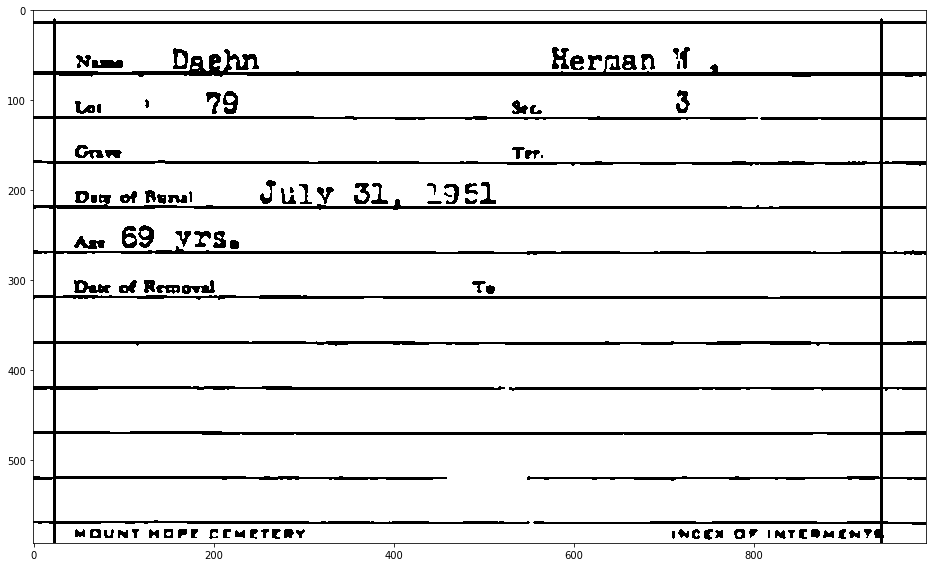

In [21]:
# draw auxiliary lines:
lines = [[23, 10, 23, h], [w-50, 10, w-50, h]]
first_line[1] -= 55
first_line[3] -= 55
lines.append(first_line)
for l in lines:
    ready_image = cv2.line(blur, (l[0], l[1]), (l[2], l[3]), (0, 0, 0), 2)
img_show(ready_image)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


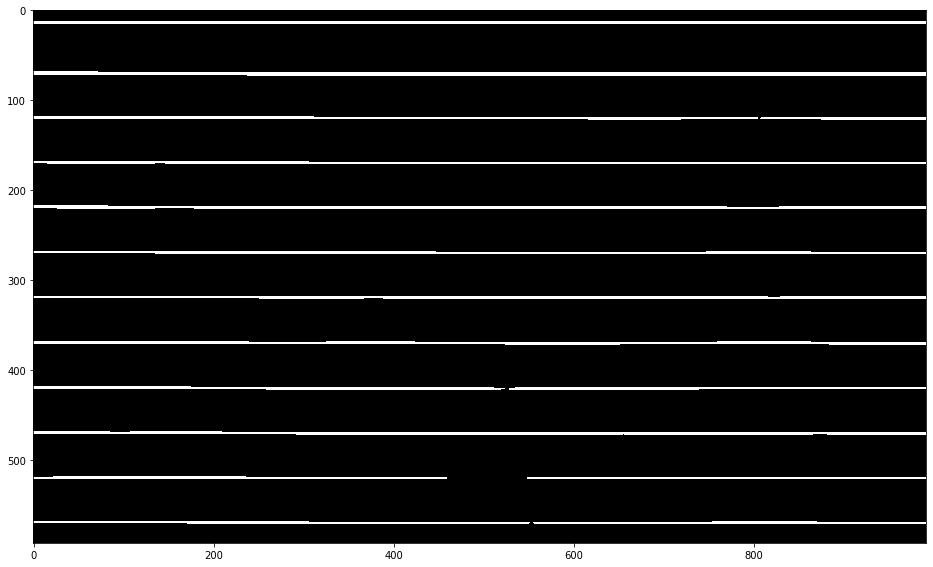

In [22]:
# find all lines:
binary = cv2.adaptiveThreshold(~ready_image, 255,
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, -10)
rows, cols = binary.shape
scale = 20
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (cols // scale, 1))
eroded = cv2.erode(binary, kernel, iterations=2)
dilatedcol = cv2.dilate(eroded, kernel, iterations=2)
img_show(dilatedcol)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


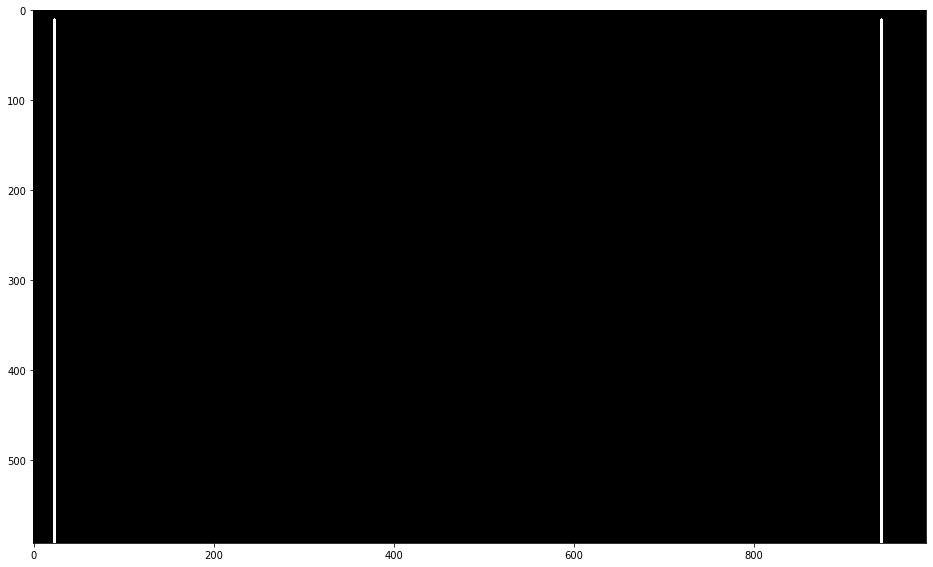

In [23]:
# find all vertical lines:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (1, rows // scale))
eroded = cv2.erode(binary, kernel, iterations=2)
dilatedrow = cv2.dilate(eroded, kernel, iterations=2)
img_show(dilatedrow)

In [24]:
# get vertex
vertex = cv2.bitwise_and(dilatedcol, dilatedrow)
print(np.where(vertex>0))

(array([ 12,  12,  12,  12,  12,  12,  13,  13,  13,  13,  13,  13,  14,
        14,  14,  14,  14,  14,  68,  68,  68,  69,  69,  69,  69,  69,
        69,  70,  70,  70,  70,  70,  70,  71,  71,  71,  71,  71,  71,
        72,  72,  72, 118, 118, 118, 119, 119, 119, 119, 119, 119, 120,
       120, 120, 120, 120, 120, 121, 121, 121, 168, 168, 168, 169, 169,
       169, 169, 169, 169, 170, 170, 170, 170, 170, 170, 217, 217, 217,
       218, 218, 218, 218, 218, 218, 219, 219, 219, 219, 219, 219, 220,
       220, 220, 268, 268, 268, 269, 269, 269, 269, 269, 269, 270, 270,
       270, 318, 318, 318, 318, 318, 318, 319, 319, 319, 319, 319, 319,
       320, 320, 320, 368, 368, 368, 369, 369, 369, 369, 369, 369, 370,
       370, 370, 370, 370, 370, 371, 371, 371, 418, 418, 418, 419, 419,
       419, 419, 419, 419, 420, 420, 420, 420, 420, 420, 468, 468, 468,
       469, 469, 469, 469, 469, 469, 470, 470, 470, 470, 470, 470, 471,
       471, 471, 518, 518, 518, 519, 519, 519, 519, 519, 519, 5

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


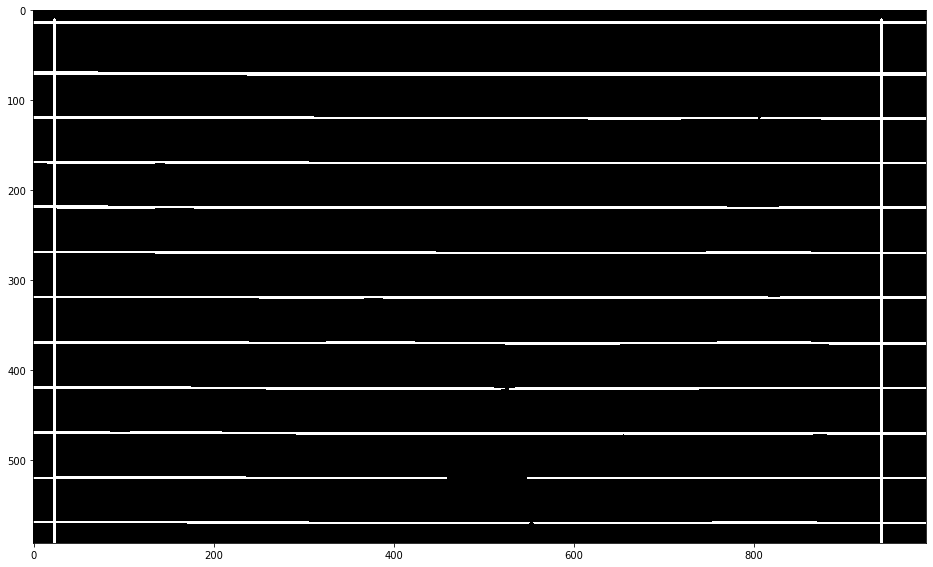

In [25]:
# plot cell
merge = cv2.add(dilatedcol, dilatedrow)
img_show(merge)

In [26]:
ys, xs = np.where(vertex > 0)
x_list, y_list = [], []

# sort list
xs, ys = np.sort(xs), np.sort(ys)
for i in range(len(xs) - 1):
    if xs[i+1] - xs[i] > 20:
        print(xs[i])

24


In [27]:
# get coordinate
ys, xs = np.where(vertex > 0)
x_list, y_list = [], []

# sort list
xs, ys = np.sort(xs), np.sort(ys)

for i in range(len(xs) - 1):
    if xs[i+1] - xs[i] > 20:
        x_list.append(xs[i])
x_list.append(xs[i])
if x_list[0] > 30:
    x_list.append(24)
x_list = sorted(x_list)

for i in range(len(ys) - 1):
    if ys[i+1] - ys[i] > 20:
        y_list.append(ys[i])
y_list.append(ys[i])

print(x_list)
print(y_list)

[24, 943]
[14, 72, 121, 170, 220, 270, 320, 371, 420, 471, 520, 570]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


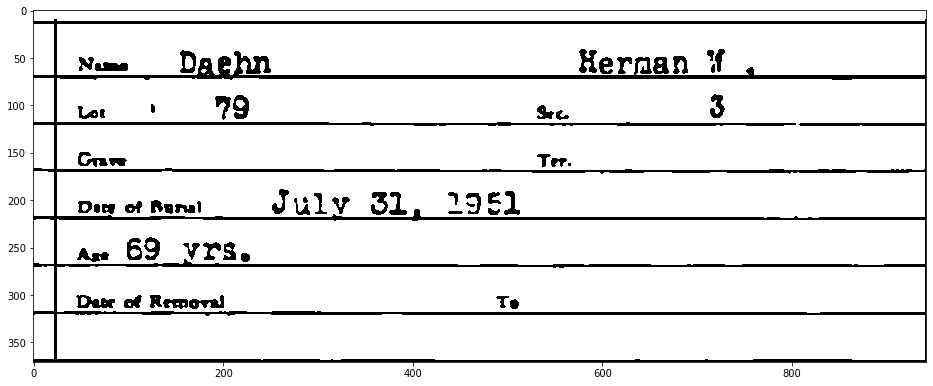

In [28]:
rec_image = ready_image[0:y_list[7], 0:w-50]
img_show(rec_image)

In [29]:
rects = []
for i in range(len(x_list) - 1):
    for j in range(len(y_list) - 1):
        rects.append(((x_list[i], y_list[j], x_list[i + 1], y_list[j + 1])))
print(rects)

[(24, 14, 943, 72), (24, 72, 943, 121), (24, 121, 943, 170), (24, 170, 943, 220), (24, 220, 943, 270), (24, 270, 943, 320), (24, 320, 943, 371), (24, 371, 943, 420), (24, 420, 943, 471), (24, 471, 943, 520), (24, 520, 943, 570)]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


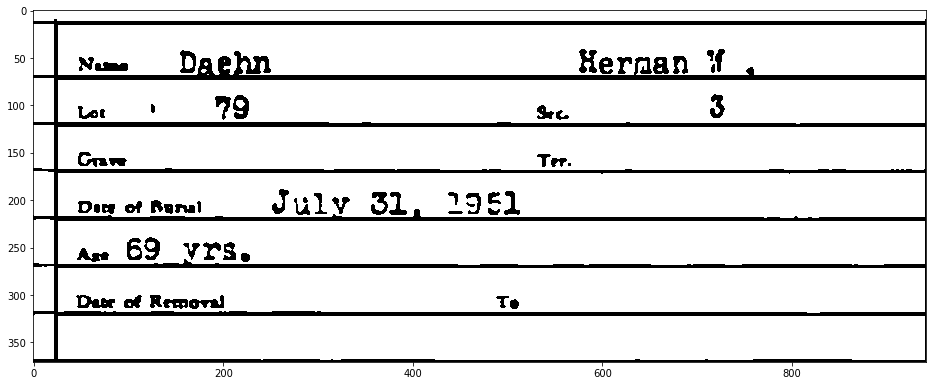

In [30]:
rect_ret = rects[:7]
for rect in rects:
    rec_image = cv2.rectangle(rec_image, (rect[0], rect[1]), (rect[2], rect[3]), (0, 0, 0), 2)
img_show(rec_image)

In [31]:
file_name = ['Name', 'Lot-Sec-Gr', 'Deed No. & Date', 'Comments']
special_char = '‘’,|-_<"=;«“&—]uv'
result = {}
name = rects[0]
detect_img = rec_image[name[1]:name[3], name[0]:name[2]]
text = pytesseract.image_to_string(detect_img, config='-l eng --psm 10')
text = ''.join([char for char in text if char not in special_char])
ret = list(text.partition(' '))

print(ret[-1])

Daehn ststs~itézQ ma


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


 ene SEX 549  ss sets aT


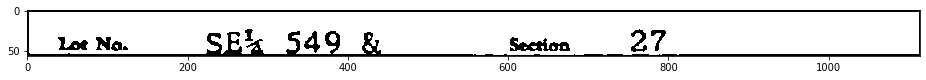

In [102]:
lot1 = rects[1]
detect_img = rec_image[lot1[1]:lot1[3], lot1[0]:lot1[2]]
text = pytesseract.image_to_string(detect_img, config='-l eng --psm 10')
text = ''.join([char for char in text if char not in special_char])
img_show(detect_img)
print(text)



In [112]:
def ocr_text(image, rect):
    file_name = ['Name', 'Lot-Sec-Gr', 'Deed No. & Date', 'Comments']
    special_char = '‘’,|-_<"=;«“&—]uv'
    result = {}
    temp = []
    for i in range(7):
        rect1 = rects[i]
        detect_img = image[rect1[1]:rect1[3], rect1[0]:rect1[2]]
        text = pytesseract.image_to_string(detect_img, config='-l eng --psm 10')
        text = ''.join([char for char in text if char not in special_char])
        ret = list(text.partition(' '))
        ret = ret[2:]
        temp.append(ret)
    
    result[file_name[0]] = temp[0]
    result[file_name[1]] = temp[1:3]
    result[file_name[2]] = temp[3:5]
    result[file_name[3]] = temp[5:]

        

    
    return result
        
        
    


In [113]:
ocr_text(rec_image, rect_ret)

{'Name': ['. Daddio   Sylia'],
 'Lot-Sec-Gr': [['ene SEX 549  ss sets aT'], ['NE 548']],
 'Deed No. & Date': [['pean. JSP AX we /7/) bE'], ['# 8896 431965']],
 'Comments': [['reamstered te'], ['']]}